In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease-data-set/parkinsons.data


## Loading modules

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,roc_curve,roc_auc_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score,GridSearchCV

In [75]:
pd.set_option('display.max_rows', 754)

In [76]:
df = pd.read_csv('/kaggle/input/parkinsons-disease-data-set/parkinsons.data')

In [77]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [78]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [79]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [80]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

/tmp/ipykernel_98/2467662941.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



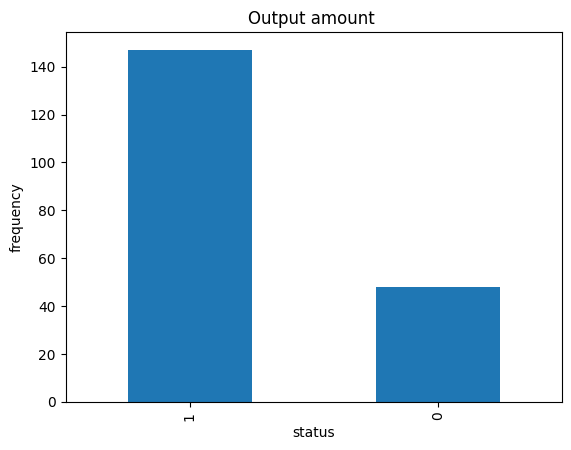

In [81]:
    count = pd.value_counts(df['status'], sort = True)
    count.plot(kind = "bar")
    plt.title("Output amount ")
    plt.xlabel("status")
    plt.ylabel("frequency")
    plt.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [83]:
df=df.drop('name',axis=1)

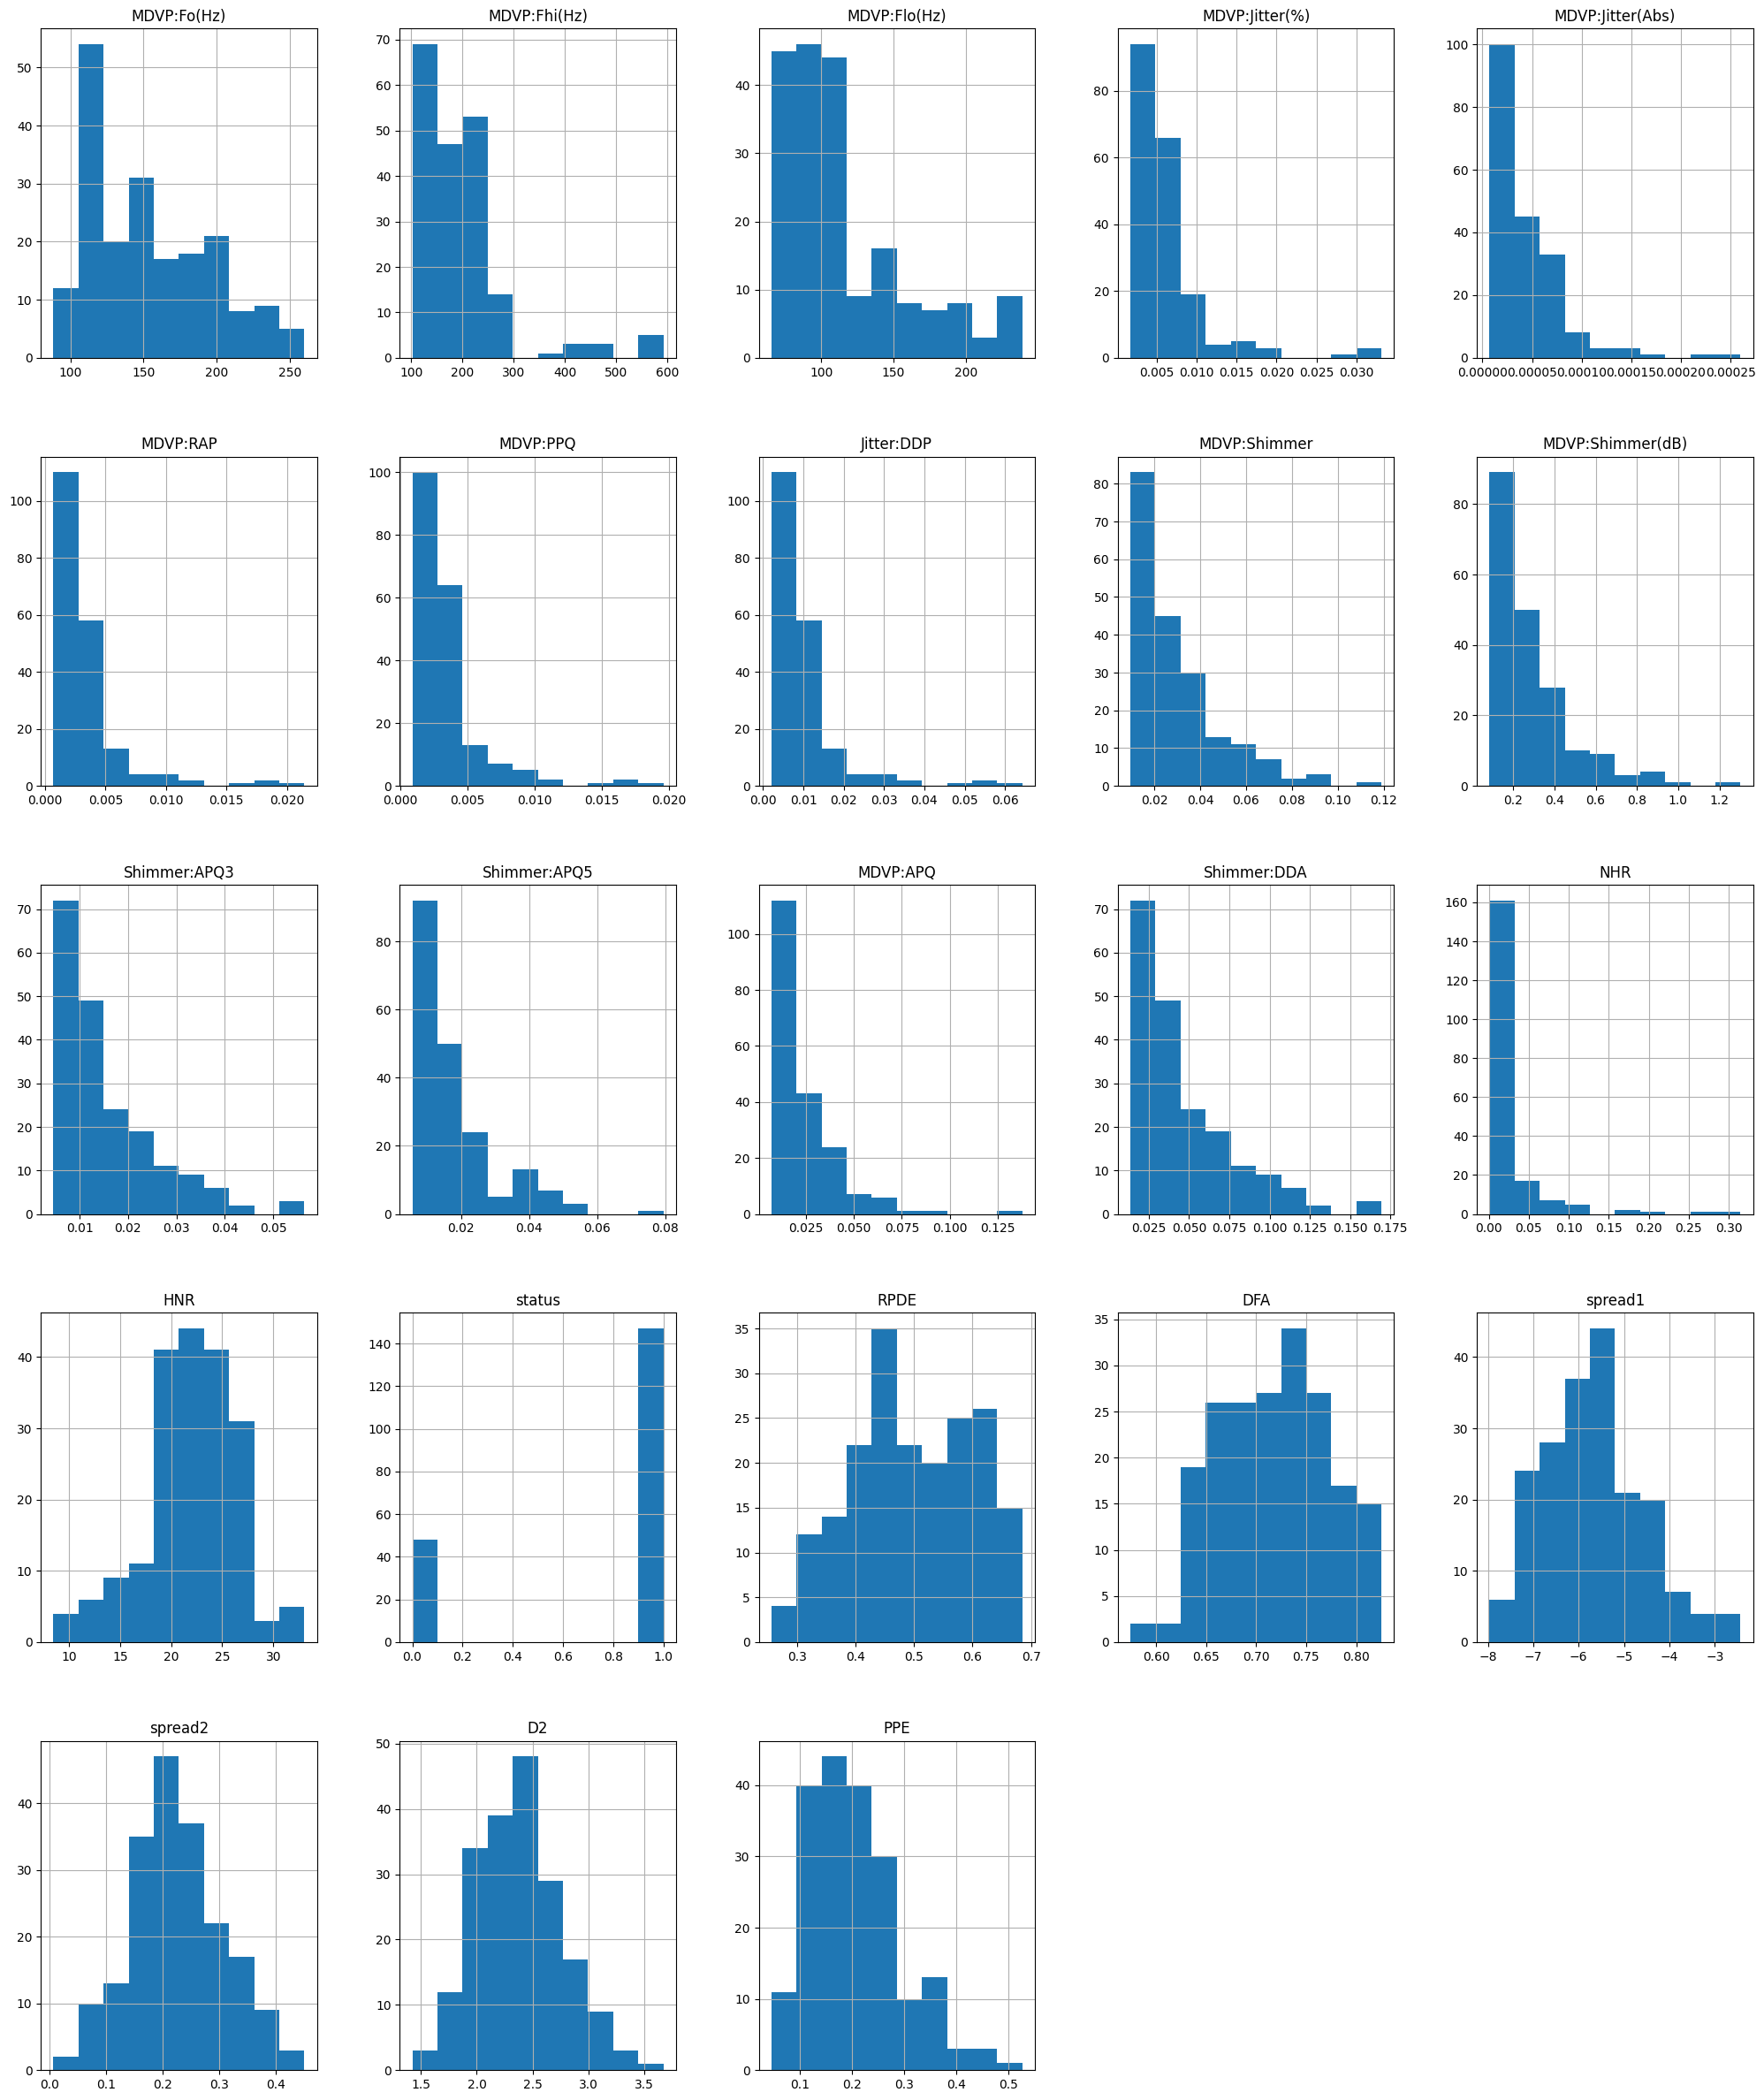

In [84]:
df.hist(figsize=(25,30));

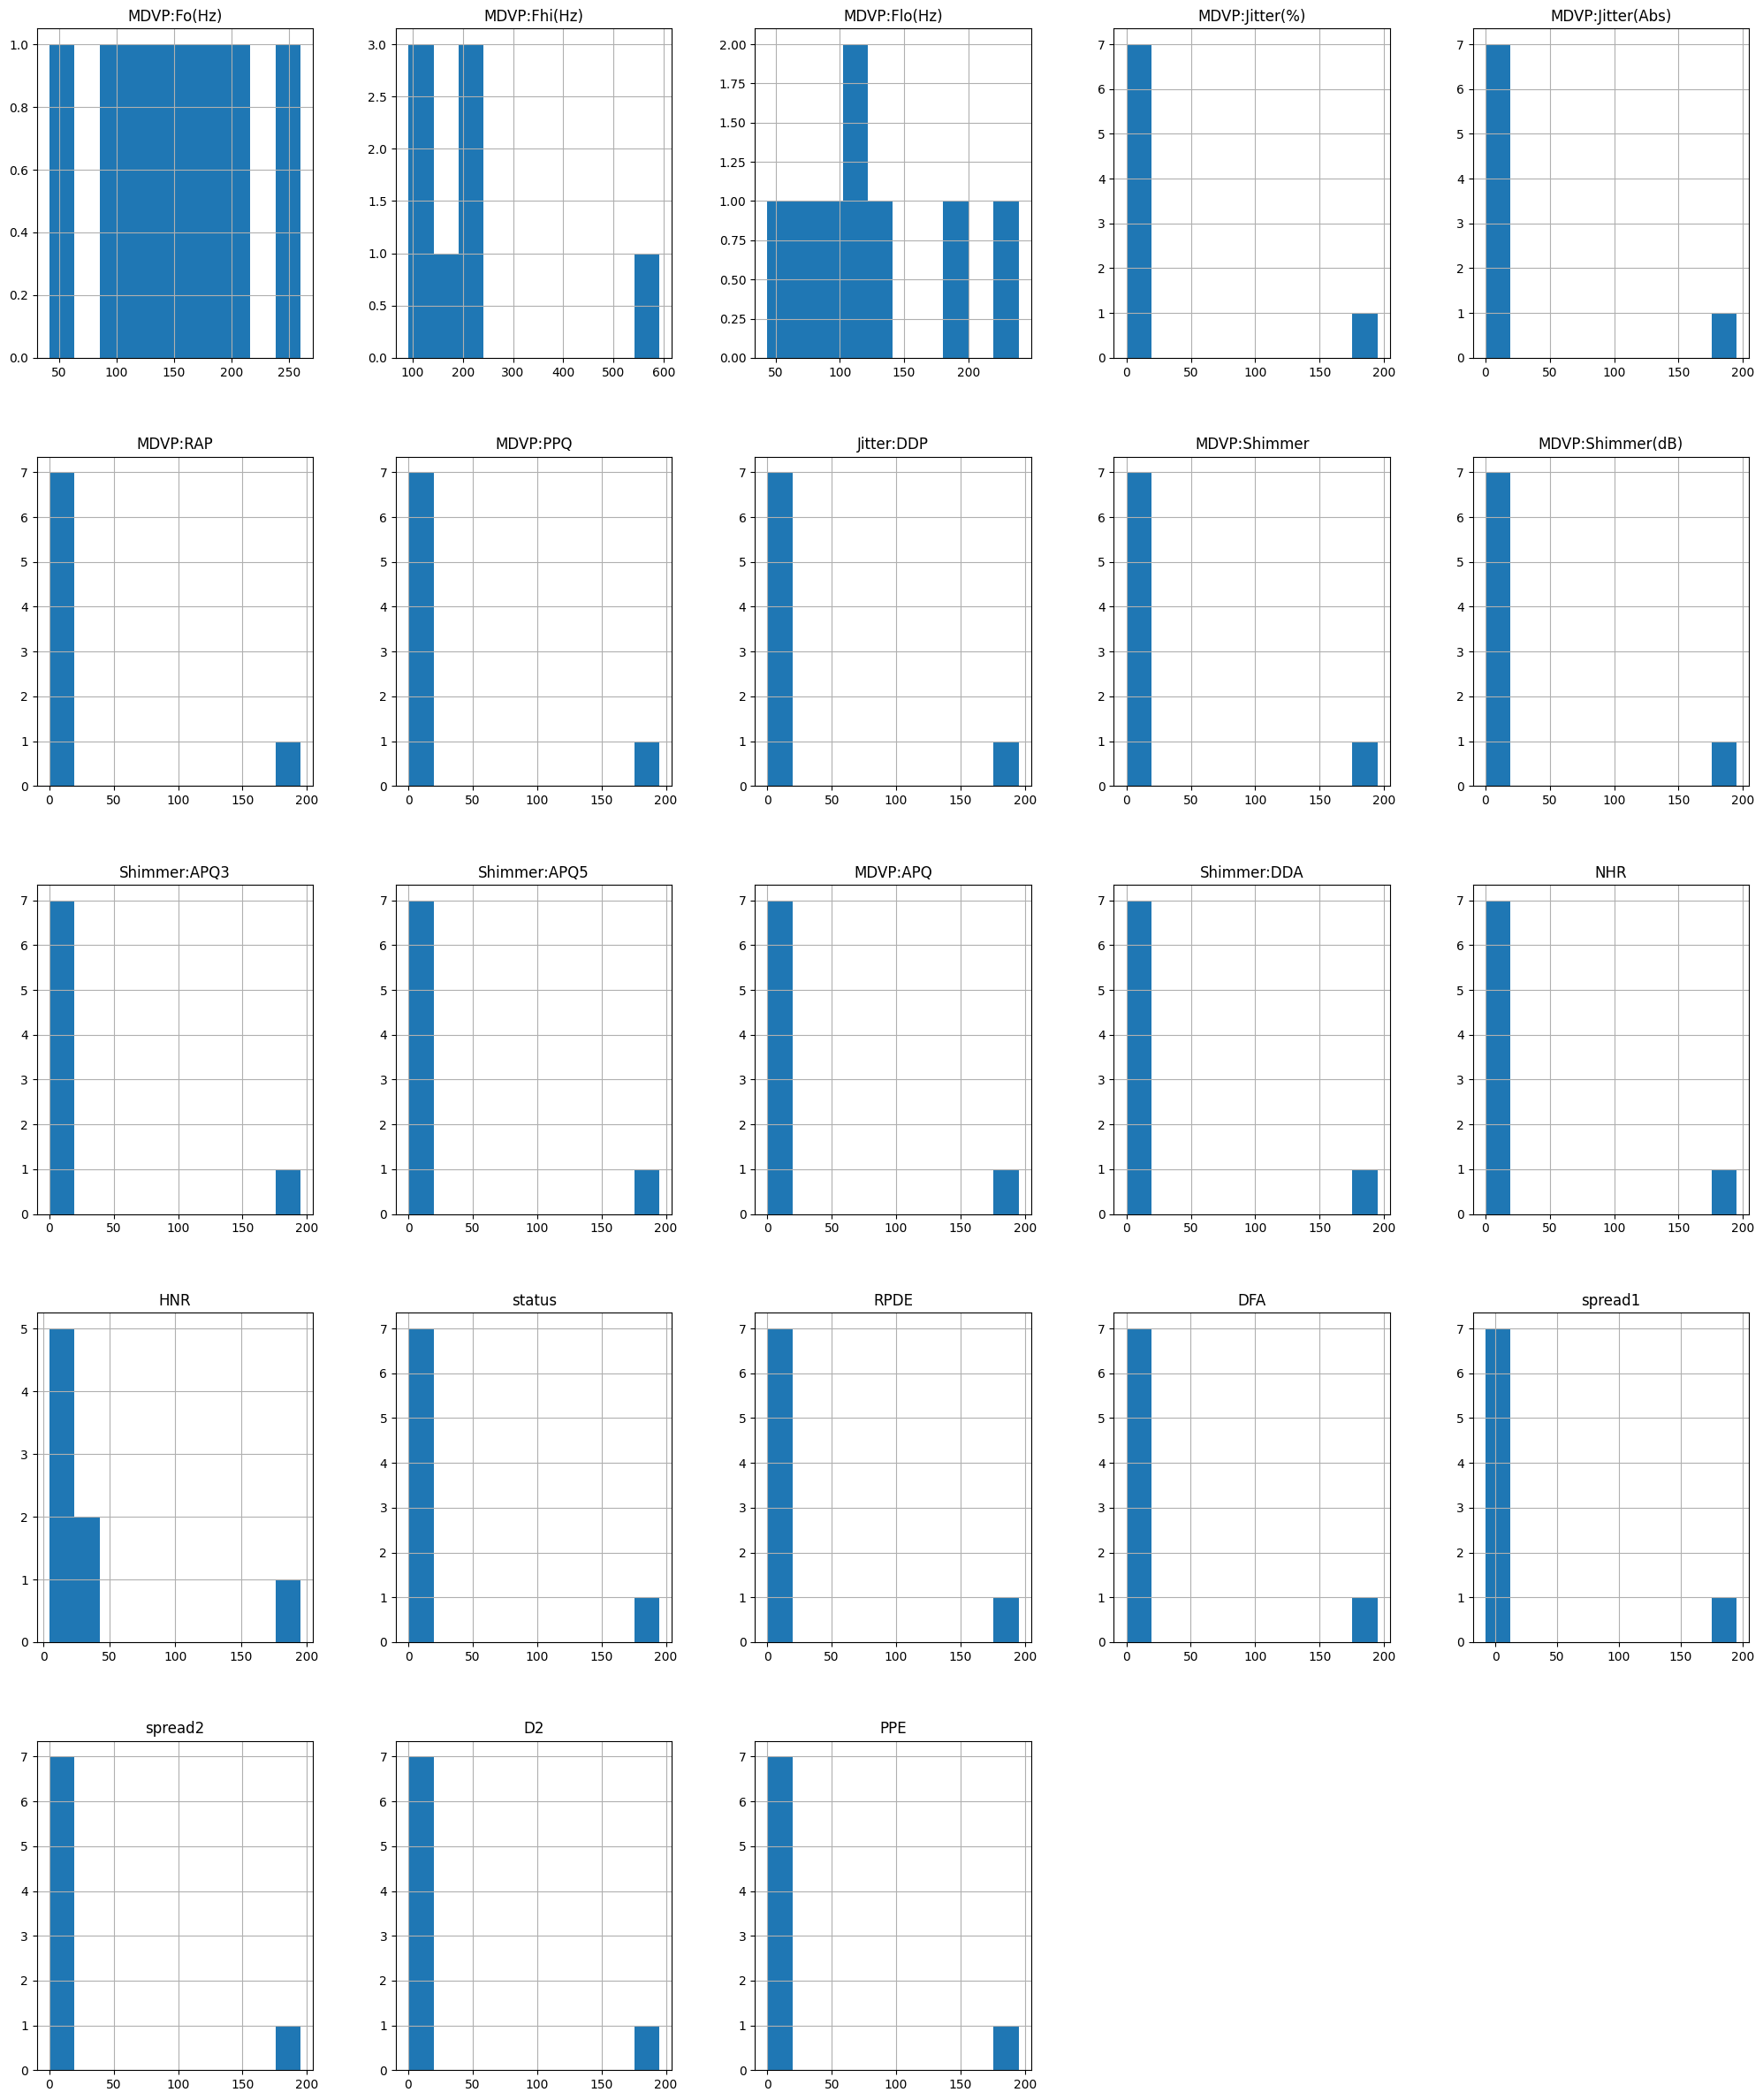

In [85]:
df.describe().hist(figsize=(25,30));

## Scaling data (normalization)

In [86]:
scaler = StandardScaler()

In [87]:
x = df.drop(['status'],axis=1)

In [88]:
y = df['status']

## Correlation matrix 

In [89]:
# sns.heatmap(df.drop('status',axis=1).corr(),annot=True,cmap='OrRd')
px.imshow(df.drop('status',axis=1).corr())

In [90]:
X_train,X_test,y_train,y_test=train_test_split(x,y,shuffle=True)

In [91]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Support vector machine classifier

In [92]:
model1 = svm.SVC(kernel='rbf', gamma=1, C=10)

In [93]:
model1.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [94]:
y_pred = model1.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)

In [95]:
test_data_accuracy*100

89.79591836734694

## Logistic Regression

In [96]:
model2=LogisticRegression()

In [97]:
model2.fit(X_train,y_train)

LogisticRegression()

In [98]:
y_pred = model2.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)

In [99]:
test_data_accuracy*100

85.71428571428571

# Ensemble Methods
## Voting

In [100]:
from sklearn.ensemble import VotingClassifier
# Create an ensemble model using voting
model3 = VotingClassifier(estimators=[('svc', model1), ('logistic_regression', model2)], voting='hard')
model3.fit(X_train,y_train)  
predictions = model3.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

89.79591836734694

## Bagging

In [101]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
model4 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10)
model4.fit(X_train, y_train)
predictions = model4.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



95.91836734693877

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
model4 = BaggingClassifier(base_estimator=model3, n_estimators=10)
model4.fit(X_train, y_train)
predictions = model4.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



87.75510204081633

In [108]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
model9 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10)
model9.fit(X_train, y_train)
predictions = model9.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



83.6734693877551

## Boosting

In [103]:
from sklearn.ensemble import AdaBoostClassifier

model5 = AdaBoostClassifier(n_estimators=50)
model5.fit(X_train, y_train)
predictions = model5.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

89.79591836734694

## Stacking

In [104]:
from sklearn.ensemble import StackingClassifier
estimators = [('svc', model1), ('logistic_regression', model2)]
meta_estimator = LogisticRegression()
model6 = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)
model6.fit(X_train, y_train)
predictions = model6.predict(X_test)

In [105]:
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

93.87755102040816

In [106]:
from sklearn.ensemble import StackingClassifier
estimators = [('svc', model1), ('logistic_regression', model2)]
meta_estimator = svm.SVC()
model7 = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)
model7.fit(X_train, y_train)
predictions = model7.predict(X_test)

In [107]:
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

93.87755102040816

#### Hence overall bagging(Decision Tree) at ~95%
#### while stacking(logistic regression, SVM) comes in second with ~ 93%